In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
class SlotMachine:
    def __init__(self, mean, std_dev):
        self.mean = mean
        self.std_dev = std_dev
    
    def generate_random_number(self):
        num = np.random.normal(loc=self.mean, scale=self.std_dev)
        return num

class e_GreedyAgent:
    def __init__(self, label,machines,steps,e, initialGuess,stepSize,UCB):
        self.reward = 0
        self.label = label
        self.values = [initialGuess] * len(machines)
        self.machines = machines
        self.e = e
        self.rewardsVector = np.zeros(steps)
        self.stepSize = stepSize
        self.timesForEachMachine = np.zeros(len(machines))
        self.UCB = UCB
    
    def get_most_valuable_machine(self):
        if(random.random() < self.e):
            choice = random.choice(range(len(self.machines)))
        else:
            max_value = max(self.values)
            indices = [i for i, value in enumerate(self.values) if value == max_value]
            choice = random.choice(indices)
        return choice
    
    def get_machine_by_UCB(self,t,c):
        choice = None
        score = float('-inf')
        for index,value in enumerate(self.values):
            if self.timesForEachMachine[index] == 0:
                return index
            currScore = value+c*math.sqrt(math.log(t)/self.timesForEachMachine[index])
            if currScore > score:
                score = currScore
                choice = index
        return choice
    
    def utilize_machine(self, chosen_machine):
        temp = self.machines[chosen_machine].generate_random_number()
        self.timesForEachMachine[chosen_machine] += 1
        return max(temp, 0)
    
    def update_values(self, chosen_machine, result, step):
        self.values[chosen_machine] += self.stepSize * (result - self.values[chosen_machine])
        if step == 0:
            self.reward = result
        else:
            self.reward += 1.0/step * (result - self.reward)
    
    def step(self, step):
        if self.UCB:
            chosen_machine = self.get_machine_by_UCB(t = step, c = 1)
        else:
            chosen_machine = self.get_most_valuable_machine()
        result = self.utilize_machine(chosen_machine)
        self.update_values(chosen_machine, result, step)
        self.rewardsVector[step] = self.reward




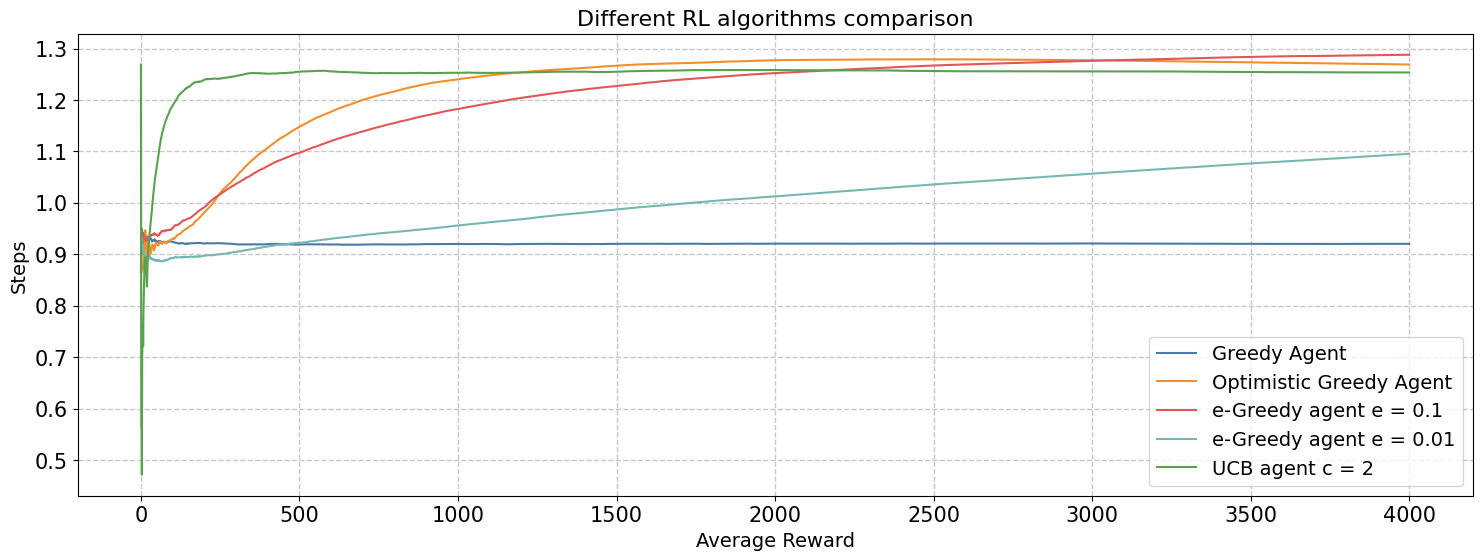

In [3]:
runs = 250
steps = 4000
n = 10
means = np.random.uniform(0, 1.5, size=n)
std_devs = np.random.uniform(0.1, 1.0, size=n)
slot_machines = [SlotMachine(mean, std_dev) for mean, std_dev in zip(means, std_devs)]
finalVectors = [np.zeros(steps) for _ in range(5)]
min_finalVectors = [np.zeros(steps) for _ in range(5)]
max_finalVectors = [np.zeros(steps) for _ in range(5)]
stepSize = 0.1

for run in range(runs):
    greedy_agent = e_GreedyAgent(label = "Greedy Agent",machines=slot_machines,steps=steps,e=0,initialGuess=0,stepSize=stepSize,UCB=False)
    optmistic_greedy_agent = e_GreedyAgent(label = "Optimistic Greedy Agent",machines=slot_machines,steps=steps,e=0,initialGuess=5,stepSize=stepSize,UCB=False)
    e_greedy_agentP01 = e_GreedyAgent(label = "e-Greedy agent e = 0.1",machines=slot_machines,steps=steps,e=0.1,initialGuess=0,stepSize=stepSize,UCB=False)
    e_greedy_agentP001 = e_GreedyAgent(label = "e-Greedy agent e = 0.01",machines=slot_machines,steps=steps,e=0.01,initialGuess=0,stepSize=stepSize,UCB=False)
    ucb_agent = e_GreedyAgent(label = "UCB agent c = 2",machines=slot_machines,steps=steps,e=0.01,initialGuess=0,stepSize=stepSize,UCB=True)


    agents = [greedy_agent,optmistic_greedy_agent,e_greedy_agentP01,e_greedy_agentP001,ucb_agent]

    for i in range(steps):
        for agent in agents:
            agent.step(i)

    for i in range(len(finalVectors)):
        finalVectors[i] += (1/(run+1)) * (agents[i].rewardsVector - finalVectors[i])
        if run == 1:
            min_finalVectors[i] = finalVectors[i]
            max_finalVectors[i] = finalVectors[i]
        else:
            min_finalVectors[i] = np.minimum(finalVectors[i],min_finalVectors[i])
            max_finalVectors[i] = np.maximum(finalVectors[i],max_finalVectors[i])


colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f']

fig, ax = plt.subplots(figsize=(18,6))
for i,vector in enumerate(finalVectors):
    plt.plot(range(steps),vector,label=agents[i].label,color=colors[i])
ax.set_title('Different RL algorithms comparison', fontsize=16)
plt.legend(fontsize = 14)
ax.set_xlabel('Average Reward', fontsize=14)
ax.set_ylabel('Steps', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

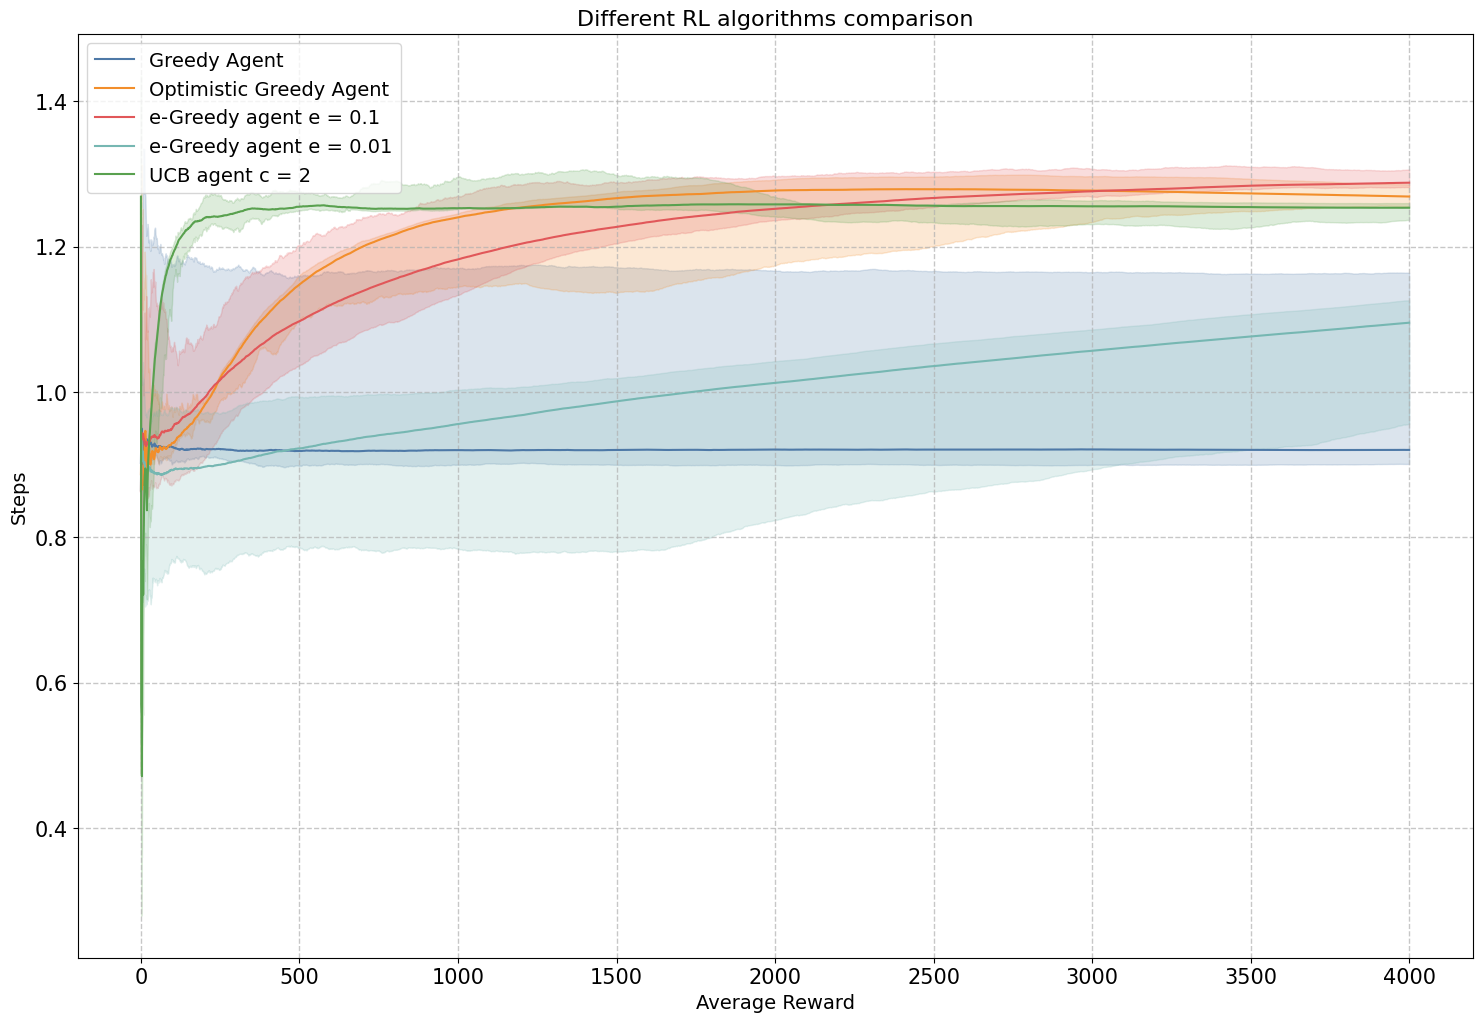

In [4]:
fig, ax = plt.subplots(figsize=(18,12))
for i,vector in enumerate(finalVectors):
    plt.plot(range(steps),vector,label=agents[i].label,color=colors[i])
    plt.fill_between(range(steps), min_finalVectors[i], max_finalVectors[i], color=colors[i], alpha=0.2, label="")
ax.set_title('Different RL algorithms comparison', fontsize=16)
plt.legend(fontsize = 14)
ax.set_xlabel('Average Reward', fontsize=14)
ax.set_ylabel('Steps', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)